# Decision Tree Regression
Author: Magdalena Whelley
## 1. Overview
Decision Tree Regression is a non-parametric learning method used to predict continuous numerical values.
Instead of fitting a single global function like in linear regression, decision trees work by:
1. Recursively partitioning the feature space into regions
2. Assigning each region a constant prediction value
3. Optimizing splits to reduce impurity (variance) in each region

This allows trees to:
- capture non-linear relationships
- model interactions between variables
- handle outliers and highly skewed data
- provide interpretable feature importance

In this notebook, I apply `scikit-learn`’s `DecisionTreeRegressor` to the California Housing Dataset, which predicts median house values from demographic and geographic features.

The notebook includes:
- Loading and inspecting the dataset
- Preprocessing and scaling
- Fitting a tree regressor
- Computing RMSE and $R^2$
- Comparing to a simple baseline
- Visualizing predictions
- Analyzing feature importances

In [2]:
# 2. Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
# 3. Load Dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# 4. Prepare Features and Target
X = df.drop("MedHouseVal", axis=1).values
y = df["MedHouseVal"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

## Dataset Description

This notebook uses the **California Housing** dataset provided by `sklearn.datasets`. The
dataset contains **20,640 samples** describing housing districts in California, each with
**eight numerical features** such as median income, average rooms, population, and
geographic location.

The task is a **regression problem**, where the goal is to predict the **median house
value** for each district. All features are continuous and the dataset contains no missing
values. Feature scaling is applied prior to training for models sensitive to feature
magnitude.

I split the data into: 
- 75% training
- 25% test data
This allows us to evaluate generalization performance after the model is trained.

## 5. Standardize the Data
Although decision trees do not require scaling, we apply anyway for the benefits:
- helps stabilize comparisons with linear models
- avoids bias if you later use ensembles like Gradient Boosting
- ensures grid visualizations are cleaner

In [5]:
# Standardize Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now each feature has a mean of $0$ and a standard deviation of $1$. 

In [7]:
# 6. Fit a Decision Tree Regressor
tree = DecisionTreeRegressor(
    max_depth=6, # controls model complexity
    min_samples_split=10, # prevents tiny leaves
    random_state=42
)

tree.fit(X_train_scaled, y_train)

y_pred = tree.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # measures prediction error
r2 = r2_score(y_test, y_pred) # measures the variance that the model explains

print("Decision Tree RMSE:", rmse)
print("Decision Tree R^2:", r2)

Decision Tree RMSE: 0.694984523292689
Decision Tree R^2: 0.6349781749335417


In [ ]:
# 7. Baseline Model for Comparison
y_baseline = np.full_like(y_test, y_train.mean())
rmse_base = np.sqrt(mean_squared_error(y_test, y_baseline))
r2_base = r2_score(y_test, y_baseline)
# baseline gives min threshold any meaningful model must beat

print("Baseline RMSE:", rmse_base)
print("Baseline R^2:", r2_base)

# if the model achieves positive R^2, it is learning real structure

Baseline RMSE: 1.1503344789953083
Baseline R^2: -3.8775657694056775e-05


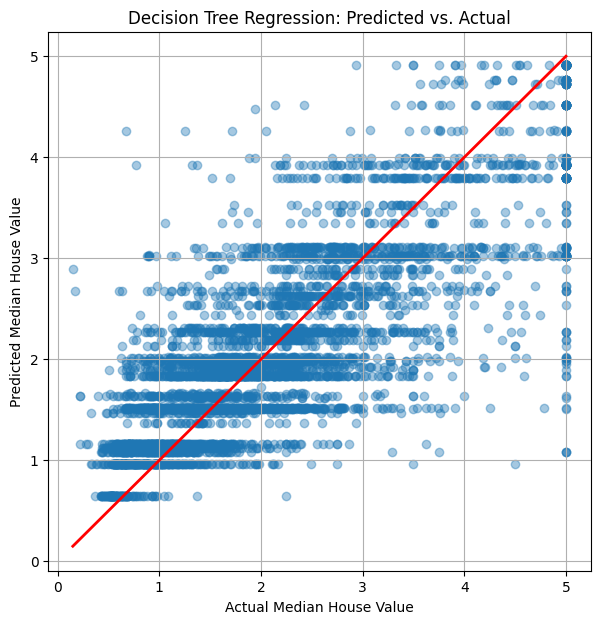

In [10]:
# 8. Plot Predicted vs Actual Values
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        color="red", linewidth=2)

plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Decision Tree Regression: Predicted vs. Actual")
plt.grid(True)
plt.show()

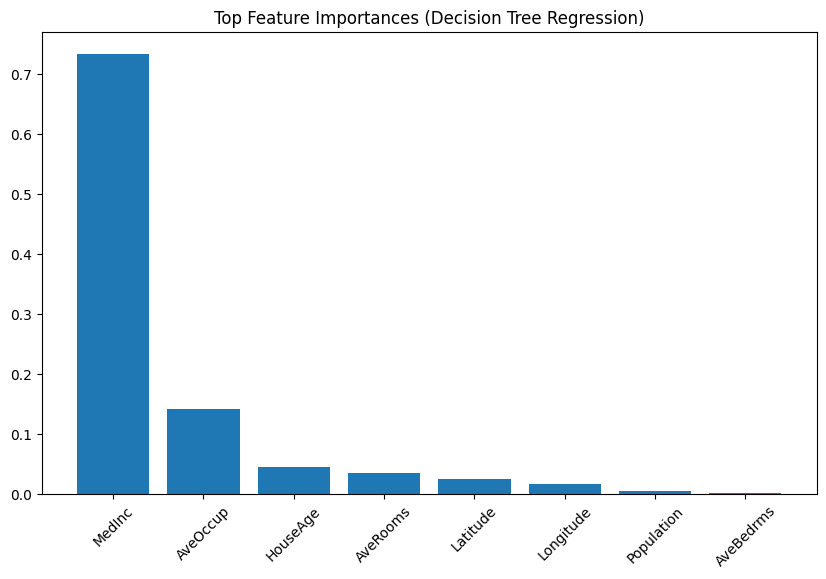

In [13]:
# 9. Feature Importance Analysis
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = np.array(data.feature_names)

plt.figure(figsize=(10,6))
plt.bar(range(8), importances[indices][:8])
plt.xticks(range(8), feature_names[indices][:8], rotation=45)
plt.title("Top Feature Importances (Decision Tree Regression)")
plt.show()

## 10. Conclusion
The decision tree regressor achieved substantial improvement over the baseline model, demonstrating its ability to capture meaningful structure in the California Housing dataset. The baseline predictor, which simply outputs the mean house value for all samples, produces a high RMSE of $1.1503$ and an 
$R^2$ essentially equal to zero. This confirms that the baseline provides no explanatory power beyond the raw average.

In contrast, the decision tree regressor achieved an RMSE of $0.6950$ and an 
$R^2$ of $0.6350$, indicating that it explains approximately 63% of the variance in median house values. This level of performance reflects the tree’s ability to model non-linear relationships and interaction effects between demographic and geographic features. The predicted-versus-actual plot highlights the typical behavior of tree-based regressors: predictions form horizontal plateaus corresponding to the constant values assigned to leaf nodes. Despite this stepwise structure, the predictions cluster closely around the ideal diagonal line, demonstrating good calibration across a broad range of values.

The feature importance analysis further reinforces the interpretability of the model. Median income (MedInc) overwhelmingly dominates as the most important predictor, aligning with well-established economic relationships between income and housing prices. Secondary features such as AveOccup, HouseAge, and AveRooms also contribute meaningfully, while latitude and longitude capture regional housing trends across California.

Overall, the decision tree regressor provides a flexible and interpretable model that significantly outperforms a simple baseline. While its piecewise-constant structure limits smoothness, the model successfully uncovers major patterns in the housing data, making it a strong introductory approach to non-linear regression. Ensemble extensions such as Random Forests or Gradient Boosting would likely yield even better predictive performance by reducing variance and smoothing the model’s predictions.